AB: 0.230000 (0.161555)
optimized_parameters {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}

SGD: 0.230000 (0.126886)
optimized_parameters {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

NNMLP: 0.340000 (0.149666)
optimized_parameters {'activation': 'relu', 'alpha': 1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, '

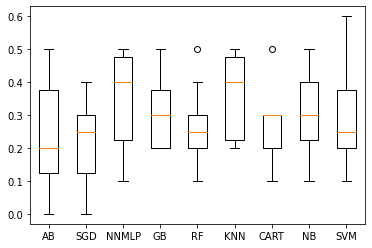


Prediction step

name =  AB
0.24
[[0 0 1 0]
 [3 1 2 3]
 [0 0 1 3]
 [3 1 3 4]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.11      0.18         9
           3       0.14      0.25      0.18         4
           4       0.40      0.36      0.38        11

    accuracy                           0.24        25
   macro avg       0.26      0.18      0.19        25
weighted avg       0.38      0.24      0.26        25


name =  SGD
0.08
[[ 1  0  0  0]
 [ 7  0  2  0]
 [ 3  0  1  0]
 [11  0  0  0]]
              precision    recall  f1-score   support

           1       0.05      1.00      0.09         1
           2       0.00      0.00      0.00         9
           3       0.33      0.25      0.29         4
           4       0.00      0.00      0.00        11

    accuracy                           0.08        25
   macro avg       0.09      0.31      0.09        25
weighted avg       0.06    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.2
[[1 0 0 0]
 [6 1 1 1]
 [1 1 2 0]
 [6 0 4 1]]
              precision    recall  f1-score   support

           1       0.07      1.00      0.13         1
           2       0.50      0.11      0.18         9
           3       0.29      0.50      0.36         4
           4       0.50      0.09      0.15        11

    accuracy                           0.20        25
   macro avg       0.34      0.43      0.21        25
weighted avg       0.45      0.20      0.20        25


name =  GB
0.28
[[1 0 0 0]
 [4 2 2 1]
 [0 1 1 2]
 [6 2 0 3]]
              precision    recall  f1-score   support

           1       0.09      1.00      0.17         1
           2       0.40      0.22      0.29         9
           3       0.33      0.25      0.29         4
           4       0.50      0.27      0.35        11

    accuracy                           0.28        25
   macro avg       0.33      0.44      0.27        25
weighted avg       0.42      0.28      0.31        25


name =  RF
0.36
[[

In [1]:
# Source code: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
# Additional list of ML methods:
## https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/
## https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html


# Compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load dataset
file = "https://raw.githubusercontent.com/ivanksinggih/machine_learning_classification/diesel_engine_optimization/diesel_engine_optimization.csv"

dataset = read_csv(file)

# Split-out validation dataset
array = dataset.values
X = array[1:,0:2]
# y = array[1:,2]  # Setting BSFC quartile as output
# y = array[1:,3]  # Setting NOx  quartile as output
y = array[1:,4]  # Setting combined BSFC and NOx quartile as output

# print("showing input and output data")
# print(X)
# print(y)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# Spot Check Algorithms
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('NNMLP', MLPClassifier(alpha=1, max_iter=1000)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:  
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  optimized_parameters = model.get_params(deep=True)
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
  print('optimized_parameters',optimized_parameters)
  print()
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.show()


print()
print('Prediction step')
# Make predictions on validation dataset
for name, model in models:
	print()
	print('name = ',name)
	model.fit(X_train, Y_train)
	# optimized_parameters = model.get_params(deep=True)
	predictions = model.predict(X_validation)
	# Evaluate predictions
	print(accuracy_score(Y_validation, predictions))
	print(confusion_matrix(Y_validation, predictions))
	print(classification_report(Y_validation, predictions))
	# print('optimized_parameters',optimized_parameters)